First, import needed modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Initalize variables

In [3]:
path = os.getcwd()
print(path)

/Users/jan/Dropbox/UP_EPQM/2222/MA/powerlinemonsters


Import datasets

In [23]:
btw = pd.read_csv(f'{path}/data/btw_treat.csv', encoding = 'UTF-8-SIG', sep=',', converters={'AGS': str})

View summary statistics

In [4]:
columns = ['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']
btw.describe().to_csv(f'{path}/tables/btw/btw_descriptives.csv', sep=';', encoding='utf-8-sig', decimal=',', columns=columns, float_format='%.2f')
btw[columns].describe()

,Union,SPD,FDP,Linke,Grüne,Andere
count,156162.000000,156162.000000,156162.000000,156162.000000,156162.000000,156162.000000
mean,43.992053,29.873403,6.749295,7.120231,5.653731,6.611288
std,12.350357,12.480438,4.534191,8.205715,3.416691,6.707481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.966941,20.000000,3.392635,0.873362,3.205128,2.194388
50%,42.857143,29.000000,5.781418,4.105439,5.029586,4.559969
75%,51.939655,38.622662,9.049774,10.000000,7.450980,8.692144
max,100.000000,88.235294,63.273728,55.294118,54.545455,65.714286


In [54]:
btw['year'].value_counts().to_csv(f'{path}/tables/btw/btw_obsyears.csv', sep=';', encoding='utf-8-sig', decimal=',', float_format='%.2f')

Split data in Erst- and Zweitstimme

In [76]:
erst = btw[btw['first_vote'] == 1]
zweit = btw[btw['second_vote'] == 1]
erst.head(10)

,AGS,GEN,year,Land,state_id,Kreis,Wahlkreis,post_1998,post_2002,post_2005,...,Andere,treatment_05,treatment_09,treatment_13,treatment_0,treatment_15,treatment_30,treatment_50,ever_treated,never_treated
0,01001000,Flensburg,1994.0,SH,1,101.0,1.0,0.0,0.0,0.0,...,1.921778,NaN,15.0,50.0,0.0,2010.0,2010.0,2010.0,Within 15km,0.0
2,01001000,Flensburg,1998.0,SH,1,101.0,1.0,0.0,0.0,0.0,...,1.798064,NaN,15.0,50.0,0.0,2010.0,2010.0,2010.0,Within 15km,0.0
4,01001000,Flensburg,2002.0,SH,1,101.0,1.0,1.0,0.0,0.0,...,0.399580,NaN,15.0,50.0,0.0,2010.0,2010.0,2010.0,Within 15km,0.0
6,01001000,Flensburg,2005.0,SH,1,101.0,1.0,1.0,1.0,0.0,...,0.802172,NaN,15.0,50.0,0.0,2010.0,2010.0,2010.0,Within 15km,0.0
8,01001000,Flensburg,2009.0,SH,1,101.0,1.0,1.0,1.0,1.0,...,1.097424,NaN,15.0,50.0,0.0,2010.0,2010.0,2010.0,Within 15km,0.0
10,01001000,Flensburg,2013.0,SH,1,101.0,1.0,1.0,1.0,1.0,...,6.674164,NaN,15.0,50.0,0.0,2010.0,2010.0,2010.0,Within 15km,0.0
12,01001000,Flensburg,2017.0,SH,1,101.0,1.0,1.0,1.0,1.0,...,8.532992,NaN,15.0,50.0,0.0,2010.0,2010.0,2010.0,Within 15km,0.0
14,01002000,Kiel,1994.0,SH,1,102.0,5.0,0.0,0.0,0.0,...,1.280413,NaN,30.0,NaN,0.0,0.0,2010.0,2010.0,Within 30km,0.0
16,01002000,Kiel,1998.0,SH,1,102.0,5.0,0.0,0.0,0.0,...,1.588057,NaN,30.0,NaN,0.0,0.0,2010.0,2010.0,Within 30km,0.0
18,01002000,Kiel,2002.0,SH,1,102.0,5.0,1.0,0.0,0.0,...,0.796048,NaN,30.0,NaN,0.0,0.0,2010.0,2010.0,Within 30km,0.0


Calculate average vote shares in all years by treatment variable

In [78]:
avg_dfs = {2005: 'treatment_05', 2010: 'treatment_09', 2014: 'treatment_13'}
treatments = {-1: 'None', 0: 'Direct Line', 15: 'Within 15km', 30: 'Within 30km', 50: 'Within 50km'}

for year, treatment in avg_dfs.items():
    #erst[treatment] = erst[treatment].astype(float)
    #erst[treatment] = erst[treatment].fillna(-1.0)
    #print(erst[treatment].value_counts())
    for value, description in treatments.items():
        erst[treatment] = np.where(erst[treatment] == value, description, erst[treatment])
    print(erst[treatment].value_counts())
    avg_dfs[year] = erst[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere', treatment, 'year']].groupby([treatment, 'year'], as_index = False).mean()
    avg_dfs[year].rename(columns = {f'{treatment}':'treatment'}, inplace = True)
#avg_dfs[2005].head(20)

nan     49909
50.0    10021
30.0     8712
15.0     7634
0.0      1805
Name: treatment_05, dtype: int64
nan     37450
50.0    14247
30.0    12329
15.0    12019
0.0      2036
Name: treatment_09, dtype: int64
nan     32562
50.0    14851
15.0    14278
30.0    13088
0.0      3302
Name: treatment_13, dtype: int64


/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_81335/3087413834.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erst[treatment] = np.where(erst[treatment] == value, description, erst[treatment])
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_81335/3087413834.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erst[treatment] = np.where(erst[treatment] == value, description, erst[treatment])
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_81335/3087413834.py:9: SettingW

Plot the average vote shares over years for treated and untreated municipalities

In [17]:
treatments = ['None', 'Direct Line', 'Within 15km', 'Within 30km', 'Within 50km']
blacks = ['#000000', '#191919', '#323232', '#4c4c4c', '#666666']
reds = ['#cc0000', '#d11919', '#d63232', '#db4c4c', '#e06666']
yellows = ['#ffff00', '#ffff19', '#ffff32', '#ffff4c', '#ffff66']
purples = ['#800080', '#8c198c', '#993299', '#a64ca6', '#b266b2']
greens = ['#008000', '#198c19', '#329932', '#4ca64c' , '#66b266']
greys = ['#808080', '#8c8c8c', '#999999', '#a6a6a6', '#b2b2b2']
markers = ['o', 's', 'v', 'D', '^']

for year, df in avg_dfs.items():
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), dpi=300)
    #set x labels
    plt.setp(axes, xticks=[1994,1998,2002,2005,2009,2013,2017])
    # set legend font size
    plt.rc('legend',fontsize=6)
    # title for entire figure
    fig.suptitle(f'Average First Vote Shares \n by treatment status in {year}', fontsize=20)

    for i, treatment in enumerate(treatments):
        plot_data = df[df['treatment'] == treatment]
        # edit subplots
        axes[0, 0].set_title('Union', fontsize=12)
        axes[0, 0].set_ylabel('% Votes', fontsize=10)
        axes[0, 0].plot(plot_data['year'], plot_data['Union'], color=blacks[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[0, 0].legend(loc='lower left')
        axes[0, 0].axvline(x=year, color='red', linestyle='--')

        axes[0, 1].set_title('SPD', fontsize=12)
        axes[0, 1].set_ylabel('% Votes', fontsize=10)
        axes[0, 1].plot(plot_data['year'], plot_data['SPD'], color=reds[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[0, 1].legend(loc='lower left')
        axes[0, 1].axvline(x=year, color='red', linestyle='--')

        axes[1, 0].set_title('FDP', fontsize=12)
        axes[1, 0].set_ylabel('% Votes', fontsize=10)
        axes[1, 0].plot(plot_data['year'], plot_data['FDP'], color=yellows[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[1, 0].legend(loc='upper left')
        axes[1, 0].axvline(x=year, color='red', linestyle='--')

        axes[1, 1].set_title('Linke', fontsize=12)
        axes[1, 1].set_ylabel('% Votes', fontsize=10)
        axes[1, 1].plot(plot_data['year'], plot_data['Linke'], color=purples[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[1, 1].legend(loc='upper left')
        axes[1, 1].axvline(x=year, color='red', linestyle='--')

        axes[2, 0].set_title('Grüne', fontsize=12)
        axes[2, 0].set_ylabel('% Votes', fontsize=10)
        axes[2, 0].plot(plot_data['year'], plot_data['Grüne'], color=greens[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[2, 0].legend(loc='upper left')
        axes[2, 0].axvline(x=year, color='red', linestyle='--')

        axes[2, 1].set_title('Andere', fontsize=12)
        axes[2, 1].set_ylabel('% Votes', fontsize=10)
        axes[2, 1].plot(plot_data['year'], plot_data['Andere'], color=greys[i], marker = markers[i], label=treatment, lw=0.8, markersize=4)
        axes[2, 1].legend(loc='upper left')
        axes[2, 1].axvline(x=year, color='red', linestyle='--')

    # Save figure
    fig.savefig(f'{path}/figures/btw/btw_{year}_vote_shares.png')
    plt.close()

Plot a map with the partys who received the largest first vote share in each year for each municipality

In [5]:
# Load shapefiles
import geopandas as gpd
municipalities = gpd.read_file(f'{path}/data/geodata/municipalities.shp')
uninc = gpd.read_file(f'{path}/data/geodata/unincorporated.shp')
states = gpd.read_file(f'{path}/data/geodata/VG250_LAN.shp')
powerlines = gpd.read_file(f'{path}/data/geodata/all_powerlines.shp')
powerlines = powerlines.set_geometry('geometry')

/opt/homebrew/Caskroom/miniconda/base/envs/vscode/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [19]:
# Prepare df with election winners
btw_win = erst[['AGS', 'year', 'Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']]
btw_win['winner'] = btw_win[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']].idxmax(axis = 1)
btw_win = btw_win[['AGS', 'year', 'winner']]
btw_win['winner'].describe()

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_66613/3184358153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btw_win['winner'] = btw_win[['Union', 'SPD', 'FDP', 'Linke', 'Grüne', 'Andere']].idxmax(axis = 1)


count     78081
unique        6
top       Union
freq      56655
Name: winner, dtype: object

In [20]:
# Merge win and municipalities
btw_win_plot = pd.merge(btw_win, municipalities, on='AGS')
btw_win_plot = btw_win_plot.set_geometry('geometry')

In [21]:
# add color column to df
years = btw_win_plot.year.unique().astype(int).tolist()
colors = {'Union': '#000000', 'SPD': '#cc0000', 'FDP': '#ffff00', 'Grüne': '#008000', 'Linke': '#800080', 'Andere': '#808080'}
btw_win_plot['color'] = 0
for party, color in colors.items():
    btw_win_plot['color'] = np.where(btw_win['winner'] == party, color, btw_win_plot['color'])

In [35]:
for year in years:
    plot_data = btw_win_plot[btw_win_plot['year'] == year]
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    uninc.plot(ax=ax, color='lightgray', edgecolor='cyan', hatch='+++++', lw=0.001, zorder=2)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=3)
    plot_data.plot(ax=ax, color=plot_data['color'], lw=0.01, zorder=4)
    powerlines.plot(ax=ax, column='descriptio', cmap='viridis', legend=True, lw=2, zorder=5)
    plt.title(f'Federal Election {year} \n Partys who receiced the largest first vote share', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/btw/btw_winners_{year}.png')
    plt.close()
    print(year)

1994
1998
2002
2005
2009
2013
2017


Plot municipalities with data for office and postal ballot

In [255]:
#Prepare dfs
btw_postal = btw[btw['Vote type'] == 'postal']
btw_postal = btw_postal[['AGS', 'year']]

btw_office = btw[btw['Vote type'] == 'office']
btw_office = btw_office[['AGS', 'year']]

In [256]:
btw_postal.value_counts('year')
btw_office.value_counts('year')

year
2013.0    22306
2017.0    21962
2009.0    20593
2005.0    19299
2002.0    19204
dtype: int64

In [257]:
#office ballot
for year in years:
    btw_office_year = btw_office[btw_office['year'] == year]
    btw_office_plot = pd.merge(btw_office_year, municipalities, on='AGS')
    btw_office_plot = btw_office_plot.set_geometry('geometry')
    
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
    btw_office_plot.plot(ax=ax, color='#E9791A', edgecolor='darkorange', lw=0.01, zorder=3)
    #btw_other_plot.plot(ax=ax, color='green', edgecolor='darkorange', lw=0.01, zorder=4)
    powerlines.plot(ax=ax, color='red', lw=2, zorder=5)
    plt.title(f'Municipalities with office ballot data in {year}', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/btw/office_votes_{year}.png')
    plt.close()

In [258]:
#postal ballot
for year in years:
    btw_postal_year = btw_postal[btw_postal['year'] == year]
    btw_postal_plot = pd.merge(btw_postal_year, municipalities, on='AGS')
    btw_postal_plot = btw_postal_plot.set_geometry('geometry')
    
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
    btw_postal_plot.plot(ax=ax, color='#E9791A', edgecolor='darkorange', lw=0.01, zorder=3)
    #btw_other_plot.plot(ax=ax, color='green', edgecolor='darkorange', lw=0.01, zorder=4)
    powerlines.plot(ax=ax, color='red', lw=2, zorder=5)
    plt.title(f'Municipalities with postal ballot data in {year}', fontsize=20)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/btw/postal_votes_{year}.png')
    plt.close()

Plot the development of vote types

In [269]:
vote_types = erst.groupby(['year', 'Vote type'], as_index=False).sum()

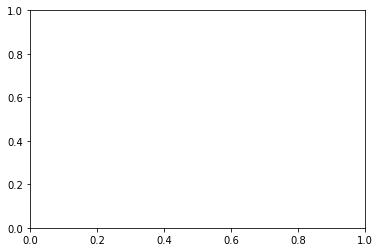

In [270]:
import seaborn as sns
fig, ax = plt.subplots()
g = sns.catplot(x='year', y='Gültig', hue='Vote type', kind='point', data=vote_types, hue_order=['office', 'postal', 'other'])
g.set(ylabel='Valid first votes (in M.)')
plt.savefig(f'{path}/figures/btw/vote_types.png')
plt.close()

Inspect whether the share of municipalities with postal/other ballot data available varies significantly for treated and untreated municipalities

In [261]:
vote_types = btw[['AGS', 'year', 'Vote type', 'treatment']]
vote_types['postal'] = np.where(vote_types['Vote type'] == 'postal', 1, 0)
vote_types['office'] = np.where(vote_types['Vote type'] == 'office', 1, 0)
vote_types['other'] = np.where(vote_types['Vote type'] == 'other', 1, 0)
vote_types = vote_types[vote_types['year'] >= 2013]
vote_types.head()

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_types['postal'] = np.where(vote_types['Vote type'] == 'postal', 1, 0)
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_types['office'] = np.where(vote_types['Vote type'] == 'office', 1, 0)
/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_25639/2820199629.py:4: SettingWithCopyWarning: 

,AGS,year,Vote type,treatment,postal,office,other
12,01001000,2013.0,office,100,0,1,0
13,01001000,2013.0,postal,100,1,0,0
14,01001000,2013.0,office,100,0,1,0
15,01001000,2013.0,postal,100,1,0,0
16,01001000,2017.0,office,100,0,1,0


In [262]:
vote_types = vote_types.groupby(['treatment', 'year'], as_index=False).sum()
vote_types['postal/office'] = vote_types['postal']/vote_types['office']
vote_types['other/office'] = vote_types['other']/vote_types['office']
vote_types = vote_types.sort_values('treatment')
vote_types.head(20)

,treatment,year,postal,office,other,postal/office,other/office
0,0,2013.0,464,932,2,0.497854,0.002146
1,0,2017.0,476,908,2,0.524229,0.002203
2,10,2013.0,543,1492,0,0.363941,0.000000
3,10,2017.0,554,1464,0,0.378415,0.000000
4,100,2013.0,2074,5466,4,0.379437,0.000732
5,100,2017.0,2104,5358,2,0.392684,0.000373
6,20,2013.0,493,1350,2,0.365185,0.001481
7,20,2017.0,510,1330,0,0.383459,0.000000
8,30,2013.0,551,1238,0,0.445073,0.000000
9,30,2017.0,564,1224,0,0.460784,0.000000


Control variables by treatment

In [13]:
controls_df = btw = pd.read_csv(f'{path}/data/btw_control.csv', encoding = 'UTF-8-SIG', sep=',', converters={'AGS': str})
controls_df.columns

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_81335/2442462903.py:1: DtypeWarning: Columns (2,3,29) have mixed types. Specify dtype option on import or set low_memory=False.
  controls_df = btw = pd.read_csv(f'{path}/data/btw_control.csv', encoding = 'UTF-8-SIG', sep=',', converters={'AGS': str})


Index(['AGS', 'year', 'GEN', 'Land', 'state_id', 'Kreis', 'Wahlkreis',
       'post_1998', 'post_2002', 'post_2005', 'post_2009', 'post_2013',
       'first_vote', 'second_vote', 'Wähler', 'Gültig', 'Union', 'SPD', 'FDP',
       'Linke', 'Grüne', 'Andere', 'treatment_05', 'treatment_09',
       'treatment_13', 'treatment_0', 'treatment_15', 'treatment_30',
       'treatment_50', 'ever_treated', 'never_treated', 'pop_density',
       'unemployed', 'foreign', 'catholic', 'avg_age', 'female', 'income',
       'east'],
      dtype='object')

In [20]:
controls_df.treatment_05.value_counts()

nan     358787
50.0     20042
30.0     17424
15.0     15268
0.0       3610
Name: treatment_05, dtype: int64

In [19]:
avg_dfs = {2005: 'treatment_05', 2010: 'treatment_09', 2014: 'treatment_13'}
treatments = {np.nan: 'None', 0: 'Direct Line', 15: 'Within 15km', 30: 'Within 30km', 50: 'Within 50km'}
for year, treatment in avg_dfs.items():
    #controls_df[treatment] = controls_df[treatment].astype(str)
    for value, description in treatments.items():
        controls_df[treatment] = np.where(controls_df[treatment] == value, description, controls_df[treatment])
    avg_dfs[year] = controls_df[['pop_density', 'unemployed', 'avg_age', 'female', treatment, 'year']].groupby([treatment, 'year'], as_index = False).agg([np.mean, np.std])
    avg_dfs[year].rename(columns = {f'{treatment}':'treatment'}, inplace = True)
avg_dfs[2005].head(20)

pop_density              unemployed              avg_age  \
                            mean          std       mean       std       mean   
treatment_05 year                                                               
0.0          1994.0   163.858056   206.856128        NaN       NaN        NaN   
             1998.0   598.202094  1019.139023   4.988630  2.175168        NaN   
             2002.0   582.543938  1014.347177   4.751356  2.403257  40.365781   
             2005.0   569.637076   997.898094   5.594447  2.409511  41.488866   
             2009.0   530.011587   953.158713   3.654811  1.611311  42.985504   
             2013.0   512.455950   922.881757   2.989459  1.389009  44.274664   
             2017.0   485.523876   872.297286   2.404280  0.956530  44.872185   
15.0         1994.0   172.450949   259.292538        NaN       NaN        NaN   
             1998.0  1288.463790  2211.599211   4.826526  2.095913        NaN   
             2002.0  1286.011718  2230.969544   4.682627  2.371701  40.518666   
             2005.0  1258.234819  2211.917960   5.573693  2.422260  41.593554   
             2009.0  1212.750763  2153.791709   3.625555  1.645216  43.093868   
             2013.0  1158.955588  2079.870391   2.957579  1.355934  44.360841   
             2017.0  1132.413771  2075.992156   2.359472  0.973798  45.032513   
30.0         1994.0   169.731330   272.242246        NaN       NaN        NaN   
             1998.0  1558.098019  2453.313600   4.881778  2.254536        NaN   
             2002.0  1579.859431  2509.419137   4.845986  2.562161  40.563083   
             2005.0  1554.115652  2497.575415   5.650778  2.616156  41.631820   
             2009.0  1515.307030  2455.354398   3.647485  1.764477  43.141978   
             2013.0  1453.231773  2403.161879   2.960507  1.412386  44.406578   

                                  female            
                          std       mean       std  
treatment_05 year                                   
0.0          1994.0       NaN        NaN       NaN  
             1998.0       NaN  50.390756  0.917767  
             2002.0  2.064956  50.374219  0.947868  
             2005.0  2.052853  50.284370  0.930621  
             2009.0  2.130065  50.217731  0.980543  
             2013.0  2.114191  50.180042  0.905295  
             2017.0  2.196001  49.923908  0.902815  
15.0         1994.0       NaN        NaN       NaN  
             1998.0       NaN  50.414785  1.051174  
             2002.0  1.797082  50.327763  1.021462  
             2005.0  1.846662  50.254094  1.056698  
             2009.0  1.907304  50.184279  1.095421  
             2013.0  1.919508  50.222853  0.968833  
             2017.0  1.927888  49.991562  0.947272  
30.0         1994.0       NaN        NaN       NaN  
             1998.0       NaN  50.448673  0.987600  
             2002.0  1.659742  50.342030  0.969898  
             2005.0  1.736213  50.288531  0.991477  
             2009.0  1.784775  50.189132  1.031154  
             2013.0  1.789125  50.236720  0.934786

Map of control variables

In [6]:
# load df
controls_df = btw = pd.read_csv(f'{path}/data/btw_control.csv', encoding = 'UTF-8-SIG', sep=',', converters={'AGS': str})
# merge with municipalities
controls_plot = pd.merge(controls_df, municipalities, on='AGS')
controls_plot = controls_plot.set_geometry('geometry')
controls_df.columns

/var/folders/wm/mtrphj0s0msgrmyshf3hgk740000gn/T/ipykernel_81335/216149623.py:2: DtypeWarning: Columns (2,3,29) have mixed types. Specify dtype option on import or set low_memory=False.
  controls_df = btw = pd.read_csv(f'{path}/data/btw_control.csv', encoding = 'UTF-8-SIG', sep=',', converters={'AGS': str})


Index(['AGS', 'year', 'GEN', 'Land', 'state_id', 'Kreis', 'Wahlkreis',
       'post_1998', 'post_2002', 'post_2005', 'post_2009', 'post_2013',
       'first_vote', 'second_vote', 'Wähler', 'Gültig', 'Union', 'SPD', 'FDP',
       'Linke', 'Grüne', 'Andere', 'treatment_05', 'treatment_09',
       'treatment_13', 'treatment_0', 'treatment_15', 'treatment_30',
       'treatment_50', 'ever_treated', 'never_treated', 'pop_density',
       'unemployed', 'foreign', 'catholic', 'avg_age', 'female', 'income',
       'east'],
      dtype='object')

In [264]:
# variables we are interested in
control_vars = {'pop_density': 'Population Density', 'female': 'Share of Females', 'foreign': 'Share of Foreigners', \
     'unemployed': 'Share of Unemployed', 'avg_income': 'Average Income', 'avg_age': 'Average Age', 'catholic': 'Share of Catholics'}

In [265]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
for var, label in control_vars.items():
    fig, ax = plt.subplots(figsize=(10, 8), dpi=300)
    ax.set_aspect('equal')
    ax.set_axis_off()
    fig.suptitle(f'{label}', fontsize=20)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('bottom', size='5%', pad=0.1)
    municipalities.plot(ax=ax, color='lightblue', edgecolor='blue', lw=0.01, zorder=1)
    states.boundary.plot(ax=ax, color='darkblue', lw = 0.1, zorder=2)
    controls_plot.plot(column=var,
           ax=ax,
           cax = cax,
           legend=True,
           legend_kwds={'label': label,
                        'orientation': "horizontal"},
            missing_kwds={'color': 'lightgrey'})
    powerlines.plot(ax=ax, color='red', lw=2, zorder=2)
    ax.annotate('Source: Rajasthan Datastore, 2019',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
    plt.savefig(f'{path}/figures/controls/{label}.png')
    plt.close()